# Lead Score Case Study for X Education

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).


Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

## 1. Data Import and Data Understanding

Import libraries and packages

In [534]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Modelling
from sklearn.model_selection import train_test_split  #to split data into train and test set
from sklearn.preprocessing import MinMaxScaler  #scale numeric variables using Min-Max scaler

from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF

# Importing RFE and LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Evaluation Metrics for Model Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

In [535]:
#import data from csv file
df_lead = pd.read_csv('leads.csv')

In [536]:
# Check the first few rows of the dataset 
pd.set_option('display.max_columns',60)
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [537]:
#Shape of dataframe - No. of rows and columns
df_lead.shape

(9240, 37)

In [538]:
#Info of data frame - different columns, their data types and null details
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [539]:
#Details of numeric columns
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Cleaning

In [540]:
# Drop any duplicate rows if present
df_lead.drop_duplicates(inplace=True)

In [541]:
df_lead.shape

(9240, 37)

The number of rows were same. Hence there was no duplicate present.

#### 2.1 Dropping unwanted columns
We can drop columns Prospect ID and Lead Number as they are IDs/number assigned to each customer and doesn't help with analysis

In [542]:
df_lead.drop(["Prospect ID","Lead Number"], axis = 1, inplace = True)
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### 2.2 Replacing 'Select' with null values

Many of the categorical variables have a level called 'Select' which is as good as Null as no values were actually selected for these columns. Hence we will replace those with Nan

In [543]:
df_lead.replace('Select', np.nan, inplace = True)

#### 2.3 Handling Null values

In [544]:
# Percentage of Null values in each column
(df_lead.isnull().sum()/len(df_lead.index)*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

We will drop columns with more than 35% of missing values. 

In [545]:
cols_to_drop = ['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Profile Index','Asymmetrique Activity Score','City','Specialization','Tags']
df_lead.drop(cols_to_drop , axis = 1, inplace = True)
df_lead.shape

(9240, 25)

Imputing Null values in other columns

In [546]:
# Values in column - What matters most to you in choosing a course
df_lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [547]:
# Replace the null values in 'What matters most to you in choosing a course' with mode - Better Career Prospects
df_lead['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)

In [548]:
# Values in column - What is your current occupation
df_lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [549]:
# Replace the null values in 'What is your current occupation' with mode - 'Unemployed' 
df_lead['What is your current occupation'].fillna('Unemployed', inplace = True)

In [550]:
# Values in column - Country
df_lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [551]:
#Replace the null values in column Country with the most occuring value(mode), which is India
df_lead['Country'].fillna('India', inplace = True)
df_lead['Country'].isnull().sum()

0

Columns Page Views Per Visit,TotalVisits,Last Activity and Lead Source has less than 2% missing values. Hence we can remove those rows from our data set.

In [552]:
#Deleting the rows which has negligible % of null values 

cols_to_del_rows = ['Page Views Per Visit','TotalVisits','Last Activity','Lead Source']
for col in cols_to_del_rows:
    df_lead = df_lead[~df_lead[col].isnull()]
    

In [553]:
df_lead.shape

(9074, 25)

In [554]:
# Check again the % of null values
(df_lead.isnull().sum()/len(df_lead.index)*100)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

All missing values has been handled.

In [555]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


## 3. Data Visualization and EDA

In [556]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

#### 3.1 Visualising the categorical variables using Countplot

#### Visualizing Binary(Yes/No) Features

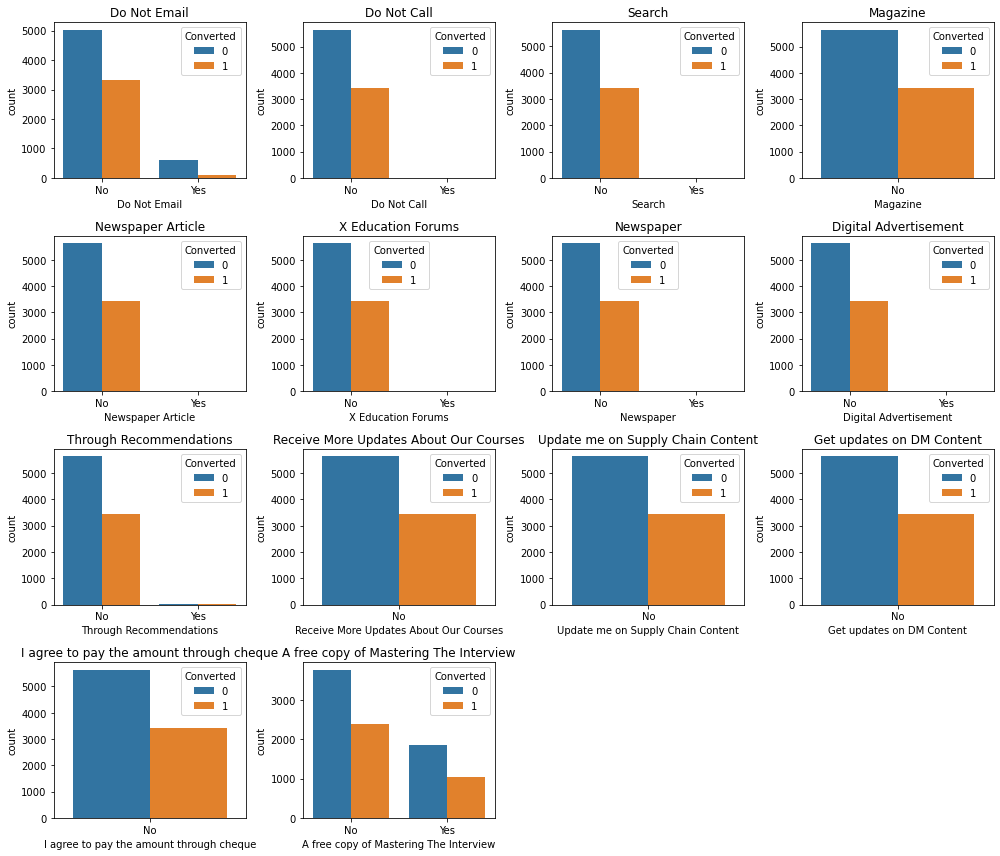

In [557]:
#Features with Yes/No values
categorical_variables = list(df_lead.nunique()[df_lead.nunique()<=2].index)

categorical_variables.remove('Converted')
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_variables):    
    plt.subplot(4,4,i+1)
    sns.countplot(x=df_lead[col],hue='Converted',data=df_lead)
    plt.title(col)
plt.tight_layout()
plt.show()

Among these variables, there is high imbalance of data for the following ones- ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], ie. majority of the values are 'No'. Hence these columns can be dropped.

In [558]:
df_lead.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,Modified


#### Visualising other categorical variables

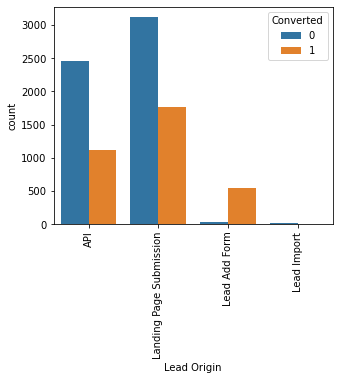

In [559]:
# Lead Origin
plt.figure(figsize=(5,4))
s1=sns.countplot(df_lead['Lead Origin'], hue=df_lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


Inference :<br>
Landing Page Submissions and API have higher number of conversions.<br>
Lead Add From has a high conversion rate however the number of leads is less.

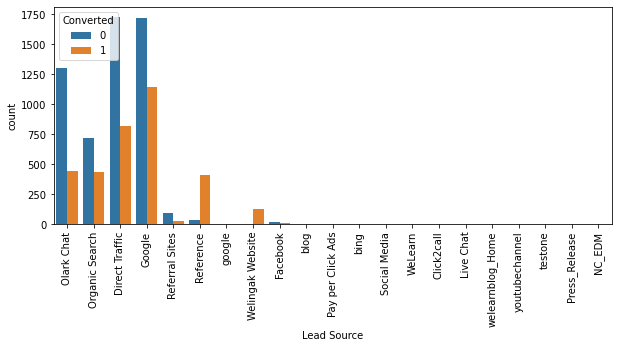

In [560]:
#Lead Source
plt.figure(figsize=(10,4))
s1=sns.countplot(df_lead['Lead Source'], hue=df_lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

There are quite a few Lead Source categories that has very less number of leads (< 1%). They all can be grouped together into a new category called 'Others'.

In [561]:
others = df_lead['Lead Source'].value_counts(normalize=True)[df_lead['Lead Source'].value_counts(normalize=True)<0.01].index
df_lead['Lead Source']=df_lead['Lead Source'].apply(lambda x: 'Others' if x in others else x)


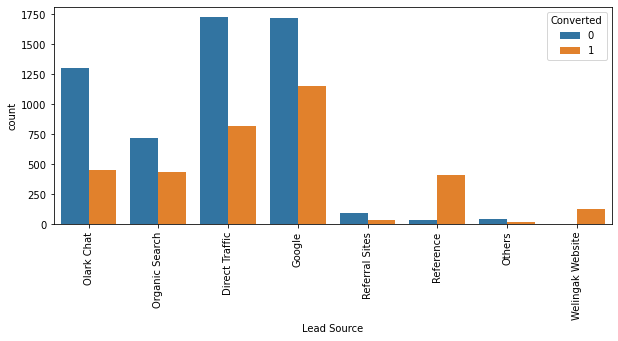

In [562]:
plt.figure(figsize=(10,4))
s1=sns.countplot(df_lead['Lead Source'], hue=df_lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Direct Traffic and Google has similar number of leads, but Google has comparatively higher conversion rate. <br>
Leads obtained by Reference has a very high chance of conversion

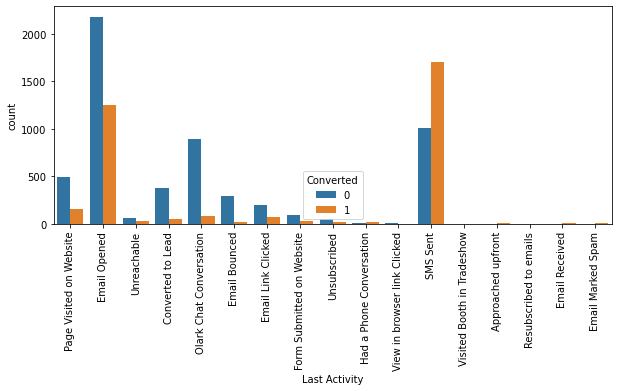

In [563]:
#Last Activity
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Last Activity'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

There are quite a few Last Activity categories that has very less number of leads (< 1%). They all can be grouped together into a new category called 'Others'.

In [564]:
others = df_lead['Last Activity'].value_counts(normalize=True)[df_lead['Last Activity'].value_counts(normalize=True)<0.01].index
df_lead['Last Activity']=df_lead['Last Activity'].apply(lambda x: 'Others' if x in others else x)

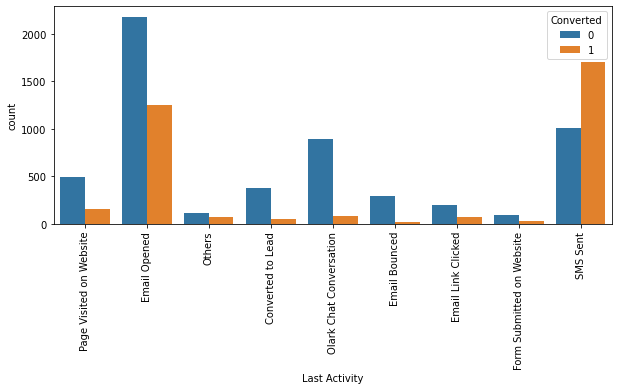

In [565]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Last Activity'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

Email opened has the highest number of leads. <br>
Last activity of SMS sent indicates a high chance of conversion. <br>
Olark Chat Conversation has a large number of leads but the conversion rate is too low. <br>

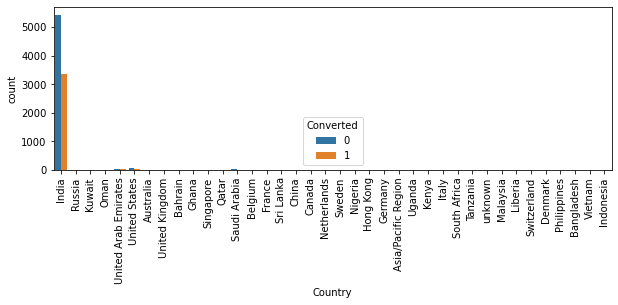

In [566]:
#Country
plt.figure(figsize=(10,3))
s3=sns.countplot(df_lead['Country'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

In [567]:
df_lead['Country'].value_counts(normalize=True)

India                   0.968371
United States           0.007604
United Arab Emirates    0.005841
Singapore               0.002645
Saudi Arabia            0.002314
United Kingdom          0.001653
Australia               0.001433
Qatar                   0.001102
Hong Kong               0.000771
Bahrain                 0.000771
Oman                    0.000661
France                  0.000661
unknown                 0.000551
South Africa            0.000441
Nigeria                 0.000441
Germany                 0.000441
Kuwait                  0.000441
Canada                  0.000441
Sweden                  0.000331
China                   0.000220
Asia/Pacific Region     0.000220
Uganda                  0.000220
Bangladesh              0.000220
Italy                   0.000220
Belgium                 0.000220
Netherlands             0.000220
Ghana                   0.000220
Philippines             0.000220
Russia                  0.000110
Switzerland             0.000110
Vietnam   

96.8% of the rows have 'India' as Country. This shows that they is low variance for the country data and hence this column can be dropped.

In [568]:
df_lead.drop(columns=['Country'],inplace=True)

In [569]:
# Occupation
#Rename column "What is your current occupation" to 'Occupation'
df_lead.rename(columns = {'What is your current occupation':'Occupation'}, inplace = True)

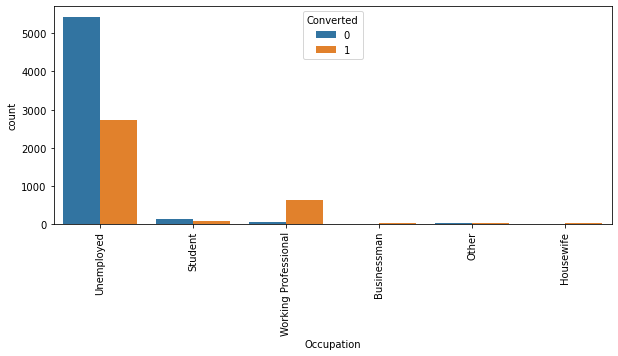

In [570]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Occupation'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()


Inference: <br>
Leads are high among unemployed people, but the ratio of conversion is high among working professionals.

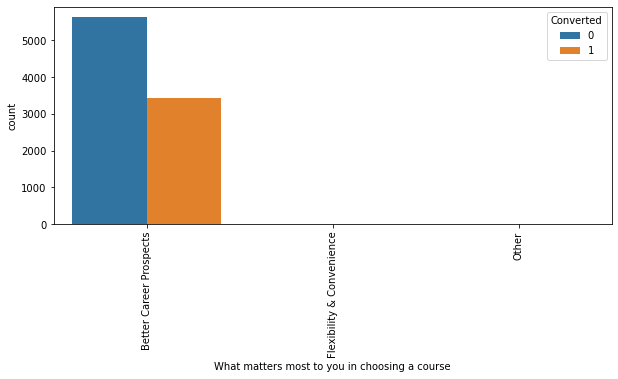

In [571]:
#What matters most to you in choosing a course
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['What matters most to you in choosing a course'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()


In [572]:
df_lead['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.99978
Flexibility & Convenience    0.00011
Other                        0.00011
Name: What matters most to you in choosing a course, dtype: float64

In [573]:
#More than 99% of the rows have the same value which means this feauture has low variance. Hence this column can be dropped.
df_lead.drop(columns=['What matters most to you in choosing a course'],inplace=True)

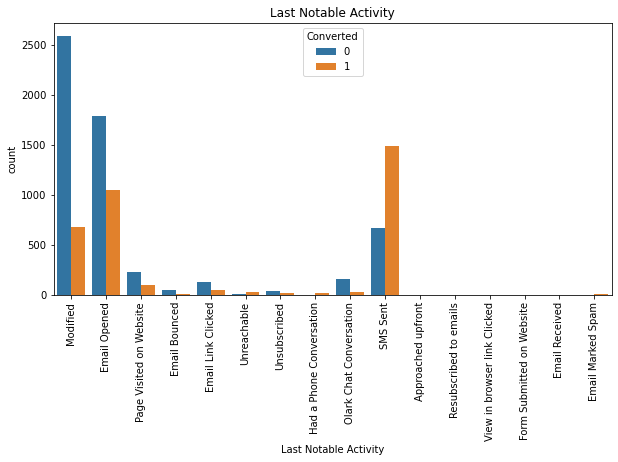

In [574]:
# Last Notable Activity
plt.figure(figsize=(10,5))

s3=sns.countplot(df_lead['Last Notable Activity'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Last Notable Activity')

plt.show()

There are quite a few Last Notable Activity categories that has very less number of leads (< 1%). They all can be grouped together into a new category called 'Others'.

In [575]:
others = df_lead['Last Notable Activity'].value_counts(normalize=True)[df_lead['Last Notable Activity'].value_counts(normalize=True)<0.01].index
df_lead['Last Notable Activity']=df_lead['Last Notable Activity'].apply(lambda x: 'Others' if x in others else x)

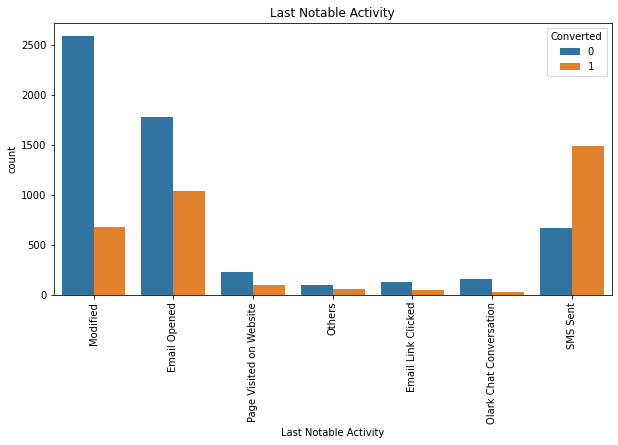

In [576]:
plt.figure(figsize=(10,5))

s3=sns.countplot(df_lead['Last Notable Activity'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.title('Last Notable Activity')

plt.show()

In [577]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Occupation                              9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   object 
 10  Last Notable Activity                   9074 non-null   obje

#### 3.2 Visualising Numeric variables

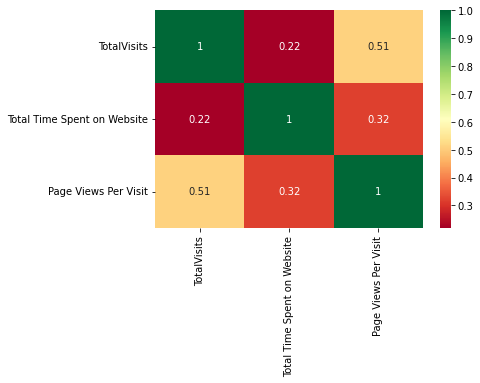

In [578]:
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'] #Numerical columns

#Correlation between numeric variables using heatmap
sns.heatmap(df_lead[num_cols].corr(),cmap="RdYlGn",annot = True)
plt.show()

There doesnt seem to be much correlation between these numeric variables

#### Outliers in Numeric Variables using Box Plot

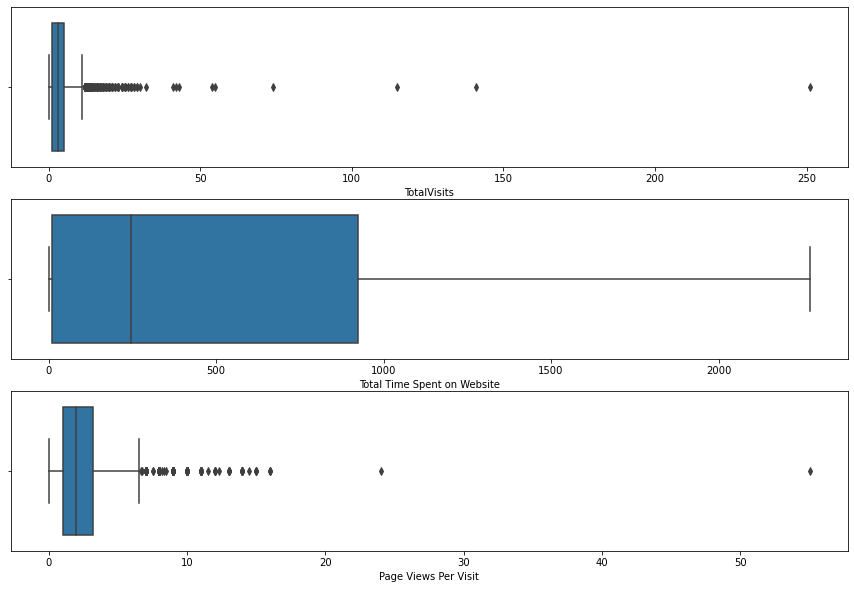

In [579]:
plt.figure(figsize=(15, 10))
for i,col in enumerate(num_cols):
    plt.subplot(3,1,i+1)
    sns.boxplot(df_lead[col])
plt.show()

In [580]:
#Check the lower and higher percentiles to see how much outliers we have
df_lead[num_cols].describe([0.05, 0.25, 0.50, 0.75, 0.90, 0.95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


From the above box plots we can see that there are outliers in the upper quantiles of TotalVisits and Page Views Per Visit. <br>
Since the difference between 95th quantile and maximum values of these two columns are pretty high, we will cap the outlier values with 95th percentile value.

In [581]:
#Replacing outlier values greater than 95th percentile with the value at 95th percentile

total_visit_95 = df_lead['TotalVisits'].quantile(0.95) #95th Percentile value for 'TotalVisits'
df_lead['TotalVisits'][df_lead['TotalVisits'] > total_visit_95] = total_visit_95

page_view_95 = df_lead['Page Views Per Visit'].quantile(0.95) #95th Percentile value for 'Page Views Per Visit'
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] > page_view_95] = page_view_95


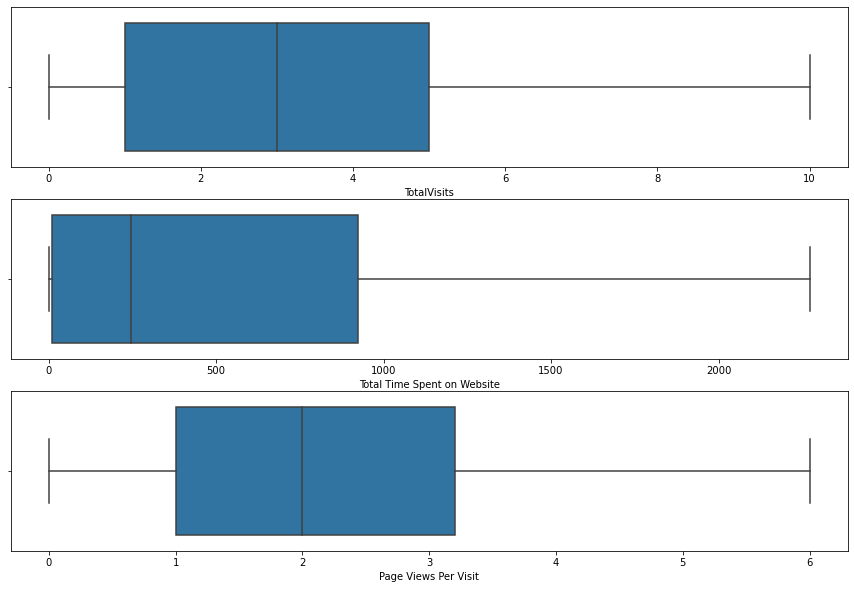

In [582]:
plt.figure(figsize=(15, 10))
for i,col in enumerate(num_cols):
    plt.subplot(3,1,i+1)
    sns.boxplot(df_lead[col])
plt.show()

#### Visualize Numeric varibales wrt. Target Varibale (Converted)

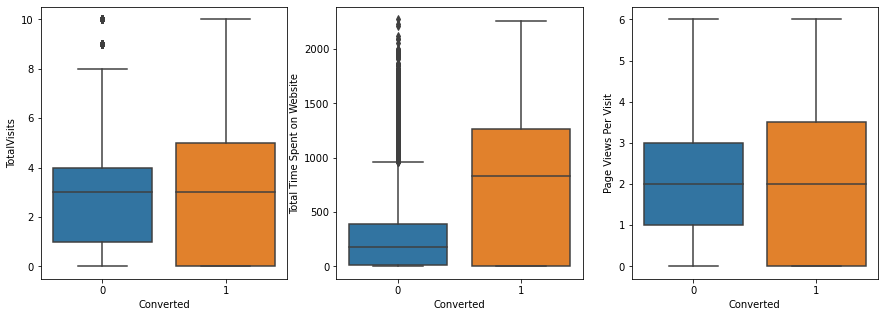

In [583]:
#Numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for i,col in enumerate(num_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(y = col , x = 'Converted', data = df_lead)
plt.show()

Inferences :
1. Total Visits and Page Views Per Visit has same median. Hence we cannot infer much from these columns
2. People who spent more time on website are more likely to become converted leads

## 4. Data Preparation

#### 4.1 Converting binary features (Yes/No) to 1/0

In [584]:
# List of columns to map
bin_cols =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function to convert Yes/No to 1/0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_lead[bin_cols] = df_lead[bin_cols].apply(binary_map)

In [585]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


#### 4.2 Dummy variables for the Categorical columns 

In [586]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

#list of categorical columns
cat_cols = ['Lead Origin','Lead Source','Last Activity','Occupation','Last Notable Activity']

dummy = pd.get_dummies(df_lead[cat_cols], drop_first=True)

# Adding the results to the master dataframe
df_lead = pd.concat([df_lead, dummy], axis=1)

In [587]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [588]:
# Drop the original columns for which we have created the dummies.
df_lead.drop(cat_cols, axis = 1, inplace = True)
df_lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [589]:
df_lead.shape

(9074, 35)

## 5. Model Building

#### 5.1 Train-Test Split

In [590]:
# Copying feature variables to X
X = df_lead.drop('Converted', axis = 1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [591]:
# Copying target variable to y
y = df_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [592]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 5.2 Feature Scaling

In [593]:
scaler = MinMaxScaler()  #Creating a scaler object

# Apply scaler() to all numerical columns except the target and dummy variables
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [594]:
X_train[num_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6351.000000,6351.000000,6351.000000
mean,0.320627,0.217585,0.379863
std,0.278748,0.244868,0.300183
min,0.000000,0.000000,0.000000
25%,0.100000,0.004492,0.166667
50%,0.300000,0.110961,0.333333
75%,0.500000,0.413522,0.555000
max,1.000000,1.000000,1.000000


In [595]:
### Checking the Convertion Rate
rate = (sum(df_lead['Converted'])/len(df_lead['Converted'].index))*100
rate

37.85541106458012

Current convertion rate of X Education is 37.86%.

#### 5.3 Correlation between features

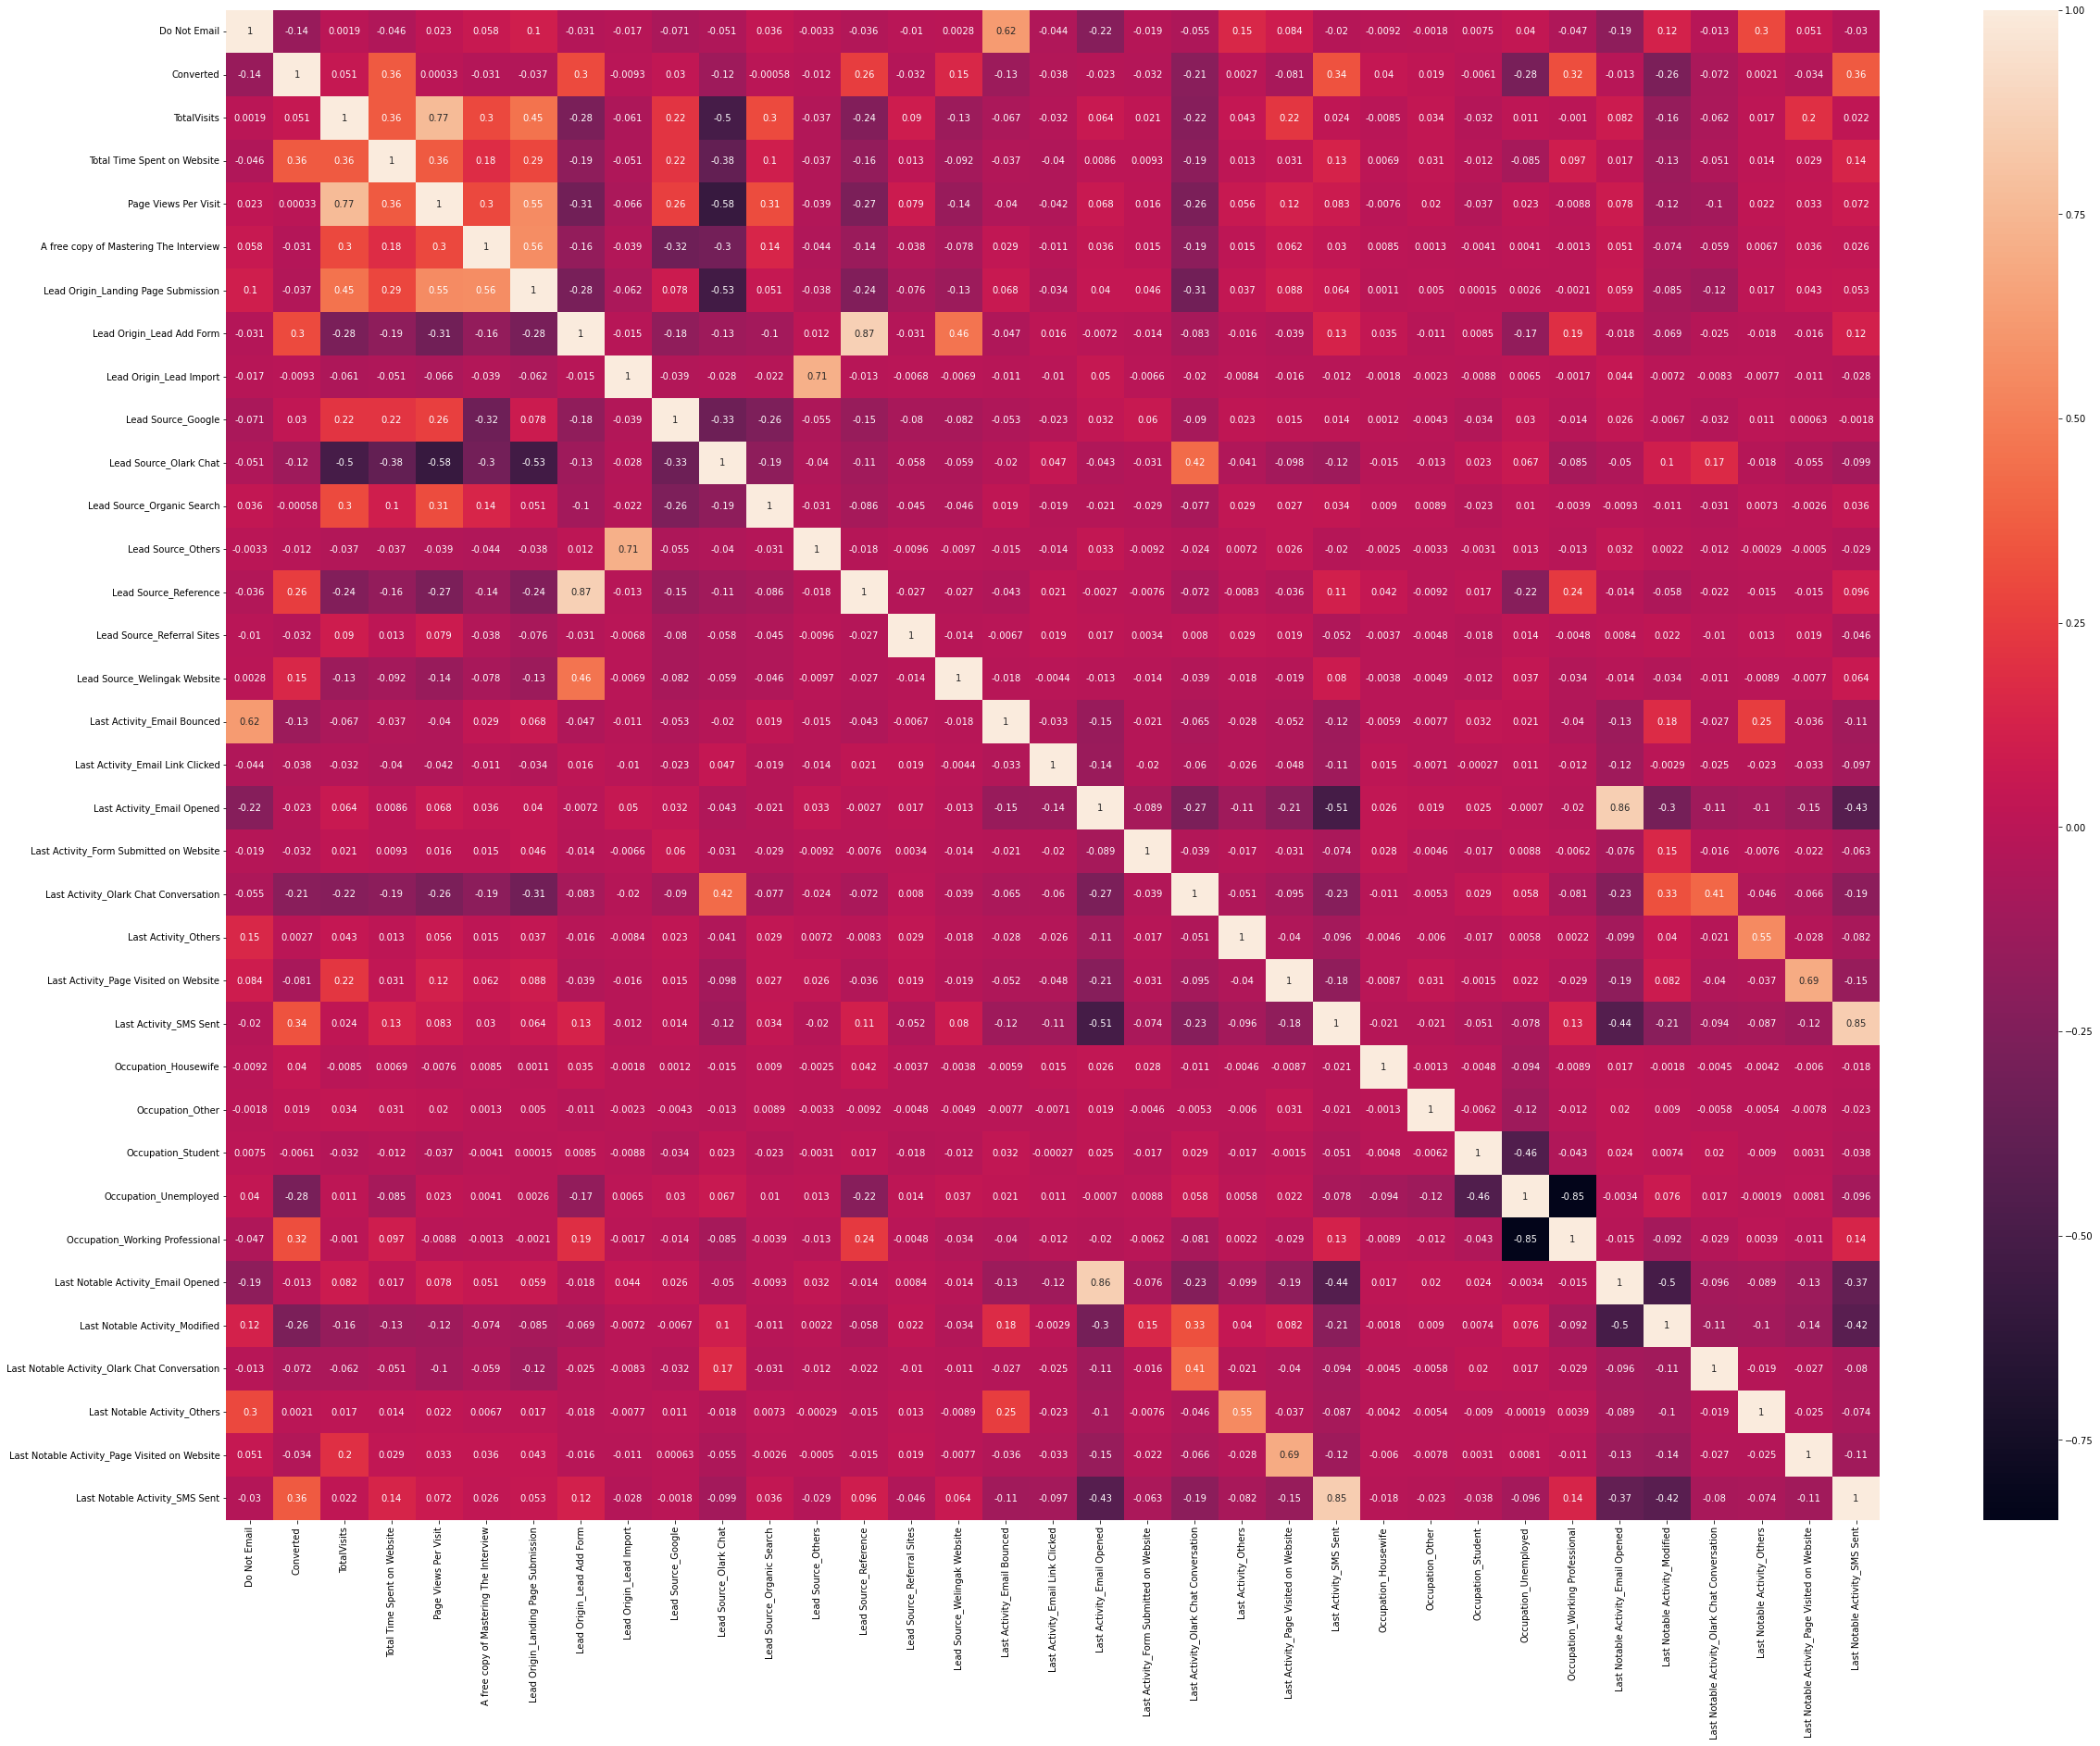

In [596]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,30))        # Size of the figure
sns.heatmap(df_lead.corr(),annot = True)
plt.show()

In [597]:
#Dropping highly correlated dummy variables

X_test = X_test.drop(['Lead Origin_Lead Add Form','Occupation_Unemployed','Last Activity_SMS Sent','Last Activity_Email Opened'], 1)
X_train = X_train.drop(['Lead Origin_Lead Add Form','Occupation_Unemployed','Last Activity_SMS Sent','Last Activity_Email Opened'], 1)

#### 5.4 Model Building

We will be doing a 'Balanced Approach' method for model building, ie. first we will select top 20 features using RFE - Recursive Feature selection and then fine tune the selection manually by adding/deleting features based on their p-value and VIF.

In [598]:
# Function to display VIF values
def print_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [599]:
# Find the top 20 feature for model building using RFE
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [600]:
#Display features with their rfe rank
df_rfe_rank = pd.DataFrame()
df_rfe_rank['Column'] = X_train.columns
df_rfe_rank['rfe_support'] = rfe.support_
df_rfe_rank['rfe_rank'] = rfe.ranking_

df_rfe_rank.sort_values(by='rfe_rank')

,Column,rfe_support,rfe_rank
0,Do Not Email,True,1
27,Last Notable Activity_Others,True,1
23,Occupation_Working Professional,True,1
22,Occupation_Student,True,1
21,Occupation_Other,True,1
20,Occupation_Housewife,True,1
19,Last Activity_Page Visited on Website,True,1
17,Last Activity_Olark Chat Conversation,True,1
16,Last Activity_Form Submitted on Website,True,1
15,Last Activity_Email Link Clicked,True,1


In [601]:
# Columns which were supported/selected by RFE
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Occupation_Housewife',
       'Occupation_Other', 'Occupation_Student',
       'Occupation_Working Professional', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


Model 1 - with RFE Selected Features

In [602]:
#Building the first model with RFE selected variables

# Creating a new data frame X_tain_rfe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable  
X_train_log1 = sm.add_constant(X_train_rfe)
log1 = sm.GLM(y_train,X_train_log1, family = sm.families.Binomial())

#Summary of our logistic model
res1 = log1.fit()
print(res1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.1
Date:                Mon, 27 Feb 2023   Deviance:                       5254.3
Time:                        11:42:33   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3969
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [603]:
print_vif(X_train_rfe)

                                   Features   VIF
3                      Page Views Per Visit  6.12
1                               TotalVisits  5.95
6                        Lead Source_Others  2.11
4                   Lead Origin_Lead Import  2.10
2               Total Time Spent on Website  2.08
0                              Do Not Email  1.90
9               Last Activity_Email Bounced  1.78
19           Last Notable Activity_SMS Sent  1.53
5                    Lead Source_Olark Chat  1.46
12    Last Activity_Olark Chat Conversation  1.41
13    Last Activity_Page Visited on Website  1.23
17          Occupation_Working Professional  1.19
7                     Lead Source_Reference  1.16
18             Last Notable Activity_Others  1.15
10         Last Activity_Email Link Clicked  1.05
8              Lead Source_Welingak Website  1.02
11  Last Activity_Form Submitted on Website  1.02
16                       Occupation_Student  1.02
14                     Occupation_Housewife  1.01


Since the p-value of Occupation_Housewife is 0.999 which is greater than 0.05, lets build our next model after dropping this feature

Model 2 - Dropping Occupation_Housewife

In [604]:

# drop 'Occupation_Housewife' from the train data set
X_train_rfe = X_train_rfe.drop('Occupation_Housewife', axis = 1)

# Adding a constant variable  
X_train_log2 = sm.add_constant(X_train_rfe)
log2 = sm.GLM(y_train,X_train_log2, family = sm.families.Binomial())

#Summary of our logistic model
res2 = log2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.0
Date:                Mon, 27 Feb 2023   Deviance:                       5264.1
Time:                        11:42:34   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3960
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [605]:
print_vif(X_train_rfe)

                                   Features   VIF
3                      Page Views Per Visit  6.12
1                               TotalVisits  5.95
6                        Lead Source_Others  2.11
4                   Lead Origin_Lead Import  2.10
2               Total Time Spent on Website  2.08
0                              Do Not Email  1.90
9               Last Activity_Email Bounced  1.78
18           Last Notable Activity_SMS Sent  1.53
5                    Lead Source_Olark Chat  1.46
12    Last Activity_Olark Chat Conversation  1.41
13    Last Activity_Page Visited on Website  1.23
16          Occupation_Working Professional  1.19
7                     Lead Source_Reference  1.16
17             Last Notable Activity_Others  1.15
10         Last Activity_Email Link Clicked  1.05
8              Lead Source_Welingak Website  1.02
11  Last Activity_Form Submitted on Website  1.02
15                       Occupation_Student  1.02
14                         Occupation_Other  1.01


Since the p-value of Lead Origin_Lead Import is 0.119 which is greater than 0.05, lets build our next model after dropping this feature

Model 3 - Dropping Lead Origin_Lead Import

In [606]:
# drop 'Lead Origin_Lead Import' from the train data set
X_train_rfe = X_train_rfe.drop('Lead Origin_Lead Import', axis = 1)

# Adding a constant variable  
X_train_log3 = sm.add_constant(X_train_rfe)
log3 = sm.GLM(y_train,X_train_log3, family = sm.families.Binomial())

#Summary of our logistic model
res3 = log3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2633.3
Date:                Mon, 27 Feb 2023   Deviance:                       5266.5
Time:                        11:42:34   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3958
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Since the p-value of Occupation_Other is 0.109 which is greater than 0.05, lets build our next model after dropping this feature

Model 4 - Dropping Occupation_Other

In [607]:
# drop 'Occupation_Other' from the train data set
X_train_rfe = X_train_rfe.drop('Occupation_Other', axis = 1)

# Adding a constant variable  
X_train_log4 = sm.add_constant(X_train_rfe)
log4 = sm.GLM(y_train,X_train_log4, family = sm.families.Binomial())

#Summary of our logistic model
res4 = log4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.6
Date:                Mon, 27 Feb 2023   Deviance:                       5269.2
Time:                        11:42:35   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3955
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [608]:
print_vif(X_train_rfe)

                                   Features   VIF
3                      Page Views Per Visit  6.12
1                               TotalVisits  5.95
2               Total Time Spent on Website  2.08
0                              Do Not Email  1.90
8               Last Activity_Email Bounced  1.78
16           Last Notable Activity_SMS Sent  1.53
4                    Lead Source_Olark Chat  1.46
11    Last Activity_Olark Chat Conversation  1.41
12    Last Activity_Page Visited on Website  1.23
14          Occupation_Working Professional  1.19
6                     Lead Source_Reference  1.16
15             Last Notable Activity_Others  1.15
9          Last Activity_Email Link Clicked  1.05
7              Lead Source_Welingak Website  1.02
10  Last Activity_Form Submitted on Website  1.02
13                       Occupation_Student  1.02
5                        Lead Source_Others  1.00


Since the p-value of Last Activity_Form Submitted on Website is 0.072 which is greater than 0.05, lets build our next model after dropping this feature

Model 5 - Dropping Last Activity_Form Submitted on Website

In [609]:

# drop 'Last Activity_Form Submitted on Website' from the train data set
X_train_rfe = X_train_rfe.drop('Last Activity_Form Submitted on Website', axis = 1)

# Adding a constant variable  
X_train_log5 = sm.add_constant(X_train_rfe)
log5 = sm.GLM(y_train,X_train_log5, family = sm.families.Binomial())

#Summary of our logistic model
res5 = log5.fit()
print(res5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.3
Date:                Mon, 27 Feb 2023   Deviance:                       5272.6
Time:                        11:42:35   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3952
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [610]:
print_vif(X_train_rfe)

                                 Features   VIF
3                    Page Views Per Visit  6.12
1                             TotalVisits  5.95
2             Total Time Spent on Website  2.08
0                            Do Not Email  1.90
8             Last Activity_Email Bounced  1.78
15         Last Notable Activity_SMS Sent  1.52
4                  Lead Source_Olark Chat  1.46
10  Last Activity_Olark Chat Conversation  1.41
11  Last Activity_Page Visited on Website  1.23
13        Occupation_Working Professional  1.19
6                   Lead Source_Reference  1.16
14           Last Notable Activity_Others  1.15
9        Last Activity_Email Link Clicked  1.05
7            Lead Source_Welingak Website  1.02
12                     Occupation_Student  1.02
5                      Lead Source_Others  1.00


Since the p-value of Last Activity_Email Link Clicked is 0.065 which is greater than 0.05, lets build our next model after dropping this feature

Model 6 - Dropping Last Activity_Email Link Clicked

In [611]:
# drop 'Last Activity_Email Link Clicked' from the train data set
X_train_rfe = X_train_rfe.drop('Last Activity_Email Link Clicked', axis = 1)

# Adding a constant variable  
X_train_log6 = sm.add_constant(X_train_rfe)
log6 = sm.GLM(y_train,X_train_log6, family = sm.families.Binomial())

#Summary of our logistic model
res6 = log6.fit()
print(res6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.1
Date:                Mon, 27 Feb 2023   Deviance:                       5276.2
Time:                        11:42:36   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [612]:
print_vif(X_train_rfe)

                                 Features   VIF
3                    Page Views Per Visit  6.10
1                             TotalVisits  5.94
2             Total Time Spent on Website  2.08
0                            Do Not Email  1.90
8             Last Activity_Email Bounced  1.78
14         Last Notable Activity_SMS Sent  1.50
4                  Lead Source_Olark Chat  1.42
9   Last Activity_Olark Chat Conversation  1.40
10  Last Activity_Page Visited on Website  1.22
12        Occupation_Working Professional  1.19
6                   Lead Source_Reference  1.15
13           Last Notable Activity_Others  1.14
7            Lead Source_Welingak Website  1.02
11                     Occupation_Student  1.02
5                      Lead Source_Others  1.00


Since the p-value of Occupation_Student is 0.055 which is greater than 0.05, lets build our next model after dropping this feature

Model 7 - Dropping Occupation_Student

In [613]:
# drop 'Lead Origin_Lead Import' from the train data set
X_train_rfe = X_train_rfe.drop('Occupation_Student', axis = 1)

# Adding a constant variable  
X_train_log7 = sm.add_constant(X_train_rfe)
log7 = sm.GLM(y_train,X_train_log7, family = sm.families.Binomial())

#Summary of our logistic model
res7 = log7.fit()
print(res7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.9
Date:                Mon, 27 Feb 2023   Deviance:                       5279.8
Time:                        11:42:36   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3945
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [614]:
print_vif(X_train_rfe)

                                 Features   VIF
3                    Page Views Per Visit  6.10
1                             TotalVisits  5.94
2             Total Time Spent on Website  2.07
0                            Do Not Email  1.90
8             Last Activity_Email Bounced  1.78
13         Last Notable Activity_SMS Sent  1.50
4                  Lead Source_Olark Chat  1.42
9   Last Activity_Olark Chat Conversation  1.40
10  Last Activity_Page Visited on Website  1.22
11        Occupation_Working Professional  1.19
6                   Lead Source_Reference  1.15
12           Last Notable Activity_Others  1.14
7            Lead Source_Welingak Website  1.02
5                      Lead Source_Others  1.00


The feature Page Views Per Visit has a VIF greater than 5,so we can drop that feature as well

Model 8 - Dropping Page Views Per Visit

In [615]:
# drop 'Lead Origin_Lead Import' from the train data set
X_train_rfe = X_train_rfe.drop('Page Views Per Visit', axis = 1)

# Adding a constant variable  
X_train_log8 = sm.add_constant(X_train_rfe)
log8 = sm.GLM(y_train,X_train_log8, family = sm.families.Binomial())

#Summary of our logistic model
res8 = log8.fit()
print(res8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.8
Date:                Mon, 27 Feb 2023   Deviance:                       5301.6
Time:                        11:42:37   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3924
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [616]:
print_vif(X_train_rfe)

                                 Features   VIF
1                             TotalVisits  2.14
2             Total Time Spent on Website  1.98
0                            Do Not Email  1.89
7             Last Activity_Email Bounced  1.78
12         Last Notable Activity_SMS Sent  1.47
3                  Lead Source_Olark Chat  1.41
8   Last Activity_Olark Chat Conversation  1.39
9   Last Activity_Page Visited on Website  1.22
10        Occupation_Working Professional  1.19
5                   Lead Source_Reference  1.14
11           Last Notable Activity_Others  1.14
6            Lead Source_Welingak Website  1.02
4                      Lead Source_Others  1.00


With Model 8, all the features have acceptable p-values and VIF values, so we can use this as our final model.

## 6. Model Evaluation

In [617]:
# Function to get predicted values from model
def pred_from_model(X,y,res):
    y_train_pred = res.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    #Creating a dataframe with the actual churn flag and the predicted probabilities
    y_train_pred_final = pd.DataFrame({'Converted':y.values, 'Conv_Prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y.index
    #Creating new column 'Predicted' with 1 if Conv_Prob > 0.5 else 0
    y_train_pred_final['Predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
    #Creating new column 'Lead Score' which a score(between 1 and 100) assigned to each lead (Convertion Probability*100)
    y_train_pred_final['Lead Score'] = y_train_pred_final.Conv_Prob.map(lambda x : round(x*100))
    return y_train_pred_final

In [618]:
# Function to calculate Confusion metrics, Accuracy, Sensitivity, Specificity, False postive rate, Positive predictive value
# and Negative predictive value

def cal_metrics(Converted, Predicted):
    
    confusion = metrics.confusion_matrix(Converted, Predicted )
    print("Confusion Matrix:")
    #print(confusion)
    # To plot confusion matrix
    ax = sns.heatmap(confusion, annot=True, cmap = 'Blues', fmt='g')
    ax.set_title('Confusion Matrix \n\n')
    ax.set(xlabel='Predicted', ylabel='Actual')
    plt.show()
    
    print("Accuracy: ", metrics.accuracy_score(Converted, Predicted))
    
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    
    print("Sensitivity/Recall: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate: ", FP/ float(TN+FP))
    print("Positive predictive value/Precision: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))
    print("F1-Score: ", (2* (TP / float(TP+FP) * TP / float(TP+FN)) / ((TP / float(TP+FN)) + (TP / float(TP+FP)))))

In [619]:
#Model prediction on train data
y_train_pred = pred_from_model(X_train_log8,y_train,res8)
y_train_pred.head()

,Converted,Conv_Prob,Lead ID,Predicted,Lead Score
0,0,0.147219,3009,0,15
1,0,0.338090,1012,0,34
2,0,0.240263,9226,0,24
3,1,0.863146,4750,1,86
4,1,0.717422,7987,1,72


Confusion Matrix:


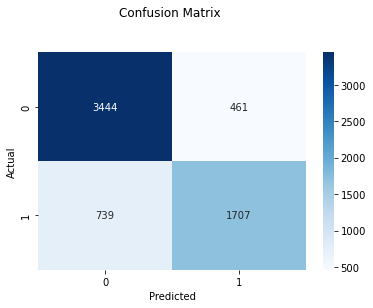

Accuracy:  0.8110533774208786
Sensitivity/Recall:  0.6978740801308259
Specificity:  0.8819462227912932
False postive rate:  0.11805377720870679
Positive predictive value/Precision:  0.7873616236162362
Negative predictive value:  0.8233325364570883
F1-Score:  0.7399219765929779


In [620]:
# Metrics for Model Evaluation on train data
cal_metrics(y_train_pred.Converted, y_train_pred.Predicted)

#### The Training Accuracy of our final Model is 81.1% and Precision is 78.74%

## 7. Plotting ROC Curve

An ROC curve helps us in determining the following points

- To shows the tradeoff between sensitivity and specificity 
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [621]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
    plt.show()

    return None

In [622]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred.Converted, y_train_pred.Conv_Prob, drop_intermediate = False )

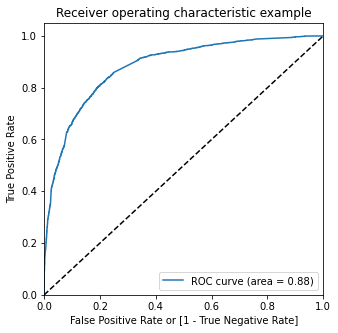

In [623]:
draw_roc(y_train_pred.Converted, y_train_pred.Conv_Prob)

The area under the ROC curve is 0.88, which means our model accuracy is good.

#### Finding Optimal Cutoff Point
Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [624]:
# Let's find the predicted values with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Conv_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred.head()

,Converted,Conv_Prob,Lead ID,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.147219,3009,0,15,1,1,0,0,0,0,0,0,0,0
1,0,0.338090,1012,0,34,1,1,1,1,0,0,0,0,0,0
2,0,0.240263,9226,0,24,1,1,1,0,0,0,0,0,0,0
3,1,0.863146,4750,1,86,1,1,1,1,1,1,1,1,1,0
4,1,0.717422,7987,1,72,1,1,1,1,1,1,1,1,0,0


In [625]:
# Calculate Accuracy, Sensitivity and Specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.601165  0.969747  0.370294
0.2   0.2  0.746654  0.917825  0.639437
0.3   0.3  0.798772  0.833606  0.776953
0.4   0.4  0.806802  0.768602  0.830730
0.5   0.5  0.811053  0.697874  0.881946
0.6   0.6  0.806015  0.628782  0.917029
0.7   0.7  0.778618  0.506950  0.948784
0.8   0.8  0.762242  0.432134  0.969014
0.9   0.9  0.710912  0.267375  0.988732


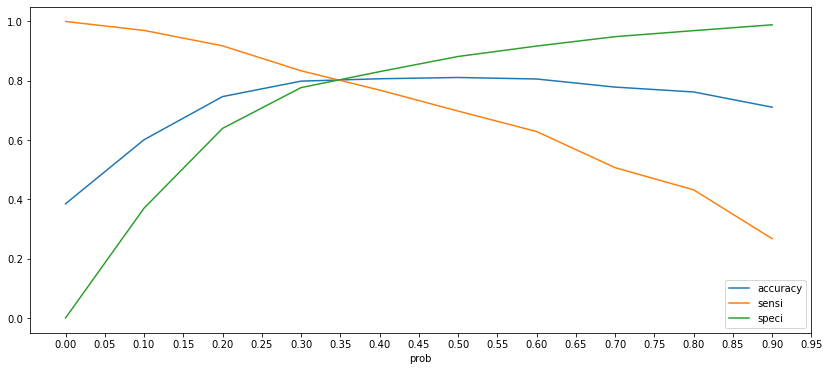

In [626]:
# Plot Accuracy, Sensitivity and Specificity for various probabilities.
p1 = cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(14,6))
minor_ticks=np.arange(0,1,0.05)
p1.set_xticks(minor_ticks)
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [627]:
#Find the final prediction using the optimal cut off 0.34
y_train_pred['final_predicted'] = y_train_pred.Conv_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred.head()

,Converted,Conv_Prob,Lead ID,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.147219,3009,0,15,1,1,0,0,0,0,0,0,0,0,0
1,0,0.338090,1012,0,34,1,1,1,1,0,0,0,0,0,0,0
2,0,0.240263,9226,0,24,1,1,1,0,0,0,0,0,0,0,0
3,1,0.863146,4750,1,86,1,1,1,1,1,1,1,1,1,0,1
4,1,0.717422,7987,1,72,1,1,1,1,1,1,1,1,0,0,1


Confusion Matrix:


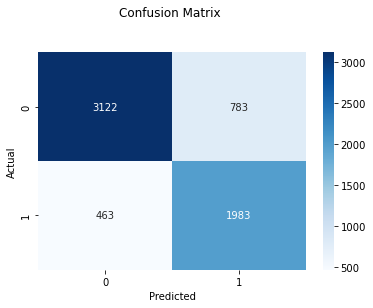

Accuracy:  0.8038104235553456
Sensitivity/Recall:  0.8107113654946853
Specificity:  0.7994878361075545
False postive rate:  0.20051216389244558
Positive predictive value/Precision:  0.7169197396963124
Negative predictive value:  0.8708507670850767
F1-Score:  0.7609363008442057


In [628]:
# Check the evaluation metrics of the model with new cut off 0.34
cal_metrics(y_train_pred.Converted, y_train_pred.final_predicted)

In [629]:
#Classification Report of the model with new cut off 0.34
print(classification_report(y_train_pred.Converted, y_train_pred.final_predicted))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3905
           1       0.72      0.81      0.76      2446

    accuracy                           0.80      6351
   macro avg       0.79      0.81      0.80      6351
weighted avg       0.81      0.80      0.81      6351



#### Precision and Recall Tradeoff

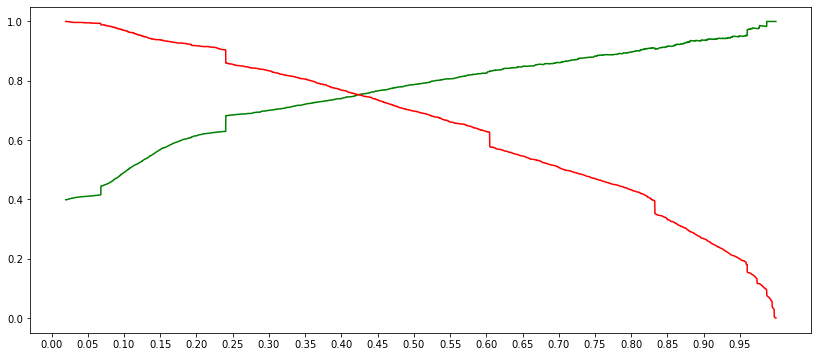

In [630]:
# Cut-off using Precision-Recall Tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred.Converted, y_train_pred.Conv_Prob)
# To plot precision vs recall for different thresholds
plt.figure(figsize=(14,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
minor_ticks=np.arange(0,1,0.05)
plt.xticks(minor_ticks)
plt.show()


From the curve above, 0.425 is the optimal cutoff probability using Precision-Recall. We can check our accuracy using this cutoff too.

In [631]:
y_train_pred['final_predicted_pr'] = y_train_pred.Conv_Prob.map( lambda x: 1 if x > 0.425 else 0)

y_train_pred.head()

,Converted,Conv_Prob,Lead ID,Predicted,Lead Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.147219,3009,0,15,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.338090,1012,0,34,1,1,1,1,0,0,0,0,0,0,0,0
2,0,0.240263,9226,0,24,1,1,1,0,0,0,0,0,0,0,0,0
3,1,0.863146,4750,1,86,1,1,1,1,1,1,1,1,1,0,1,1
4,1,0.717422,7987,1,72,1,1,1,1,1,1,1,1,0,0,1,1


Confusion Matrix:


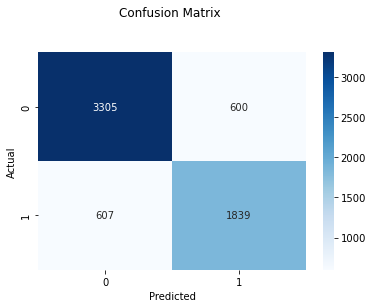

Accuracy:  0.809951188789167
Sensitivity/Recall:  0.7518397383483238
Specificity:  0.8463508322663252
False postive rate:  0.15364916773367476
Positive predictive value/Precision:  0.7539975399753998
Negative predictive value:  0.8448364008179959
F1-Score:  0.7529170931422722


In [632]:
# Check the evaluation metrics of the model with new cut off 0.425
cal_metrics(y_train_pred.Converted, y_train_pred.final_predicted_pr)

In [633]:
#Classification Report for of the model with new cut off 0.425
print(classification_report(y_train_pred.Converted, y_train_pred.final_predicted_pr))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3905
           1       0.75      0.75      0.75      2446

    accuracy                           0.81      6351
   macro avg       0.80      0.80      0.80      6351
weighted avg       0.81      0.81      0.81      6351



## 8. Prediction on Test data

In [634]:
#Scaling the numeric columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [635]:
#Keeping only the final columns used for building our model
X_test = X_test[X_train_rfe.columns]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3271,0,0.4,0.070530,0,0,0,0,0,0,0,0,0,0
1490,0,0.5,0.679695,0,0,0,0,0,0,0,1,0,0
7936,0,0.2,0.033243,0,0,0,0,0,0,0,0,0,0
4216,0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0
3830,0,0.8,0.073675,0,0,0,0,0,0,0,0,0,0


In [636]:
#Predictions on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = res8.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
3271,0.110411
1490,0.970733
7936,0.081569
4216,0.832427
3830,0.148754


In [637]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [638]:
y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.110411
1,1,1490,0.970733
2,0,7936,0.081569
3,1,4216,0.832427
4,0,3830,0.148754


In [639]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Conv_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Conv_Prob
0,3271,0,0.110411
1,1490,1,0.970733
2,7936,0,0.081569
3,4216,1,0.832427
4,3830,0,0.148754


In [640]:
# Calculate the Predicted value from cut off probability of 0.34
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Lead ID,Converted,Conv_Prob,final_predicted
0,3271,0,0.110411,0
1,1490,1,0.970733,1
2,7936,0,0.081569,0
3,4216,1,0.832427,1
4,3830,0,0.148754,0


Confusion Matrix:


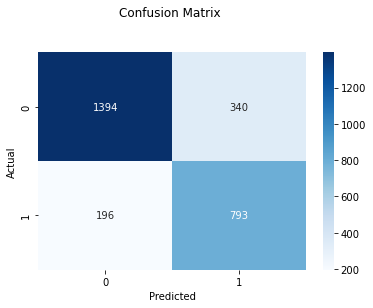

Accuracy:  0.8031582813073815
Sensitivity/Recall:  0.8018200202224469
Specificity:  0.803921568627451
False postive rate:  0.19607843137254902
Positive predictive value/Precision:  0.6999117387466902
Negative predictive value:  0.8767295597484277
F1-Score:  0.7474081055607917


In [641]:
#Evaluate the results from Test Data Prediction
cal_metrics(y_pred_final.Converted, y_pred_final.final_predicted)

#### The Accuracy of our final model on test data is 80.32% and Precision is 69.99%

In [642]:
#Classification Report for prediction on test data :
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1734
           1       0.70      0.80      0.75       989

    accuracy                           0.80      2723
   macro avg       0.79      0.80      0.79      2723
weighted avg       0.81      0.80      0.81      2723



## Conclusion

In [643]:
# To display features with corrsponding coefficients in final model
feat_coef = pd.DataFrame(round(res8.params[1:],2))
feat_coef.reset_index(inplace = True)
feat_coef.columns = ['Feature', 'Coefficient']
feat_coef

,Feature,Coefficient
0,Do Not Email,-1.65
1,TotalVisits,0.82
2,Total Time Spent on Website,4.58
3,Lead Source_Olark Chat,1.59
4,Lead Source_Others,1.30
5,Lead Source_Reference,4.34
6,Lead Source_Welingak Website,6.34
7,Last Activity_Email Bounced,-1.40
8,Last Activity_Olark Chat Conversation,-1.47
9,Last Activity_Page Visited on Website,-0.46


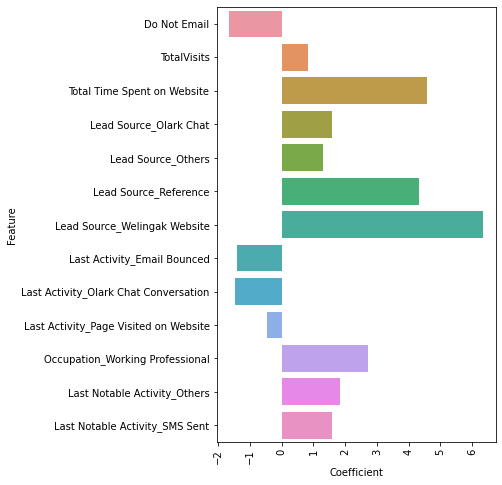

In [644]:
plt.figure(figsize=(5,8))
sns.barplot(y='Feature',x='Coefficient', data = feat_coef)
plt.xticks(rotation=90)
plt.show()

Our final model for Lead Score prediction has following characteristics:

1. All p-values are very close to zero.
2. VIFs for all features are very low. There is hardly any multicollinearity present.
3. The overall testing accuracy of 80.32% at an optimal probability threshold of 0.34
4. 13 features were selected as the most significant in predicting the conversion probability:

Features having positive impact on conversion probability 
1. Total Visits
2. Total Time Spent on Website
3. Lead Source :
    - Olark Chat	    	
    - Reference	
    - Welingak Website	
    - Others
4. Occupation 
    - Working Professional	
5. Last Notable Activity   	
    - SMS Sent
    - Others

Features having negative impact on conversion probability 
1. Do Not Email
2. Last Activity
    - Email Bounced	
    - Olark Chat Conversation	
    - Page Visited on Website	